In [8]:
import pandas as pd
import numpy as np
import pytz
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.metrics import mean_squared_error


# Beijing Multi-Site Air-Quality Data Data Set

for the simplicity I will select the variables I’m interested in studying: Date, TEMP, CO, O3, SO2 and NO2.


It includes hourly averages of lectures of 6 main air pollutants from 12 nationally-controlled air-quality monitoring sites and 6 relevant meteorological variables at multiple sites in Beijing. In total, the dataset contains 420768 instances and 18 attributes but we will only use the information from the area “Tiantan”, which contains .

The measures were recorded from March 1st, 2013 to February 28th, 2017. The meteorological data in each air-quality site are matched with the nearest weather station from the China Meteorological Administration.

Note: Missing data are denoted as NA.

In [15]:
def read_csv_files(folder_path, file_names):
    dataframes = {}
    for file_name in file_names:
        # Construir la ruta completa del archivo
        csv_path = os.path.join(folder_path, file_name)
        
        # Verificar si el archivo existe en la ruta especificada
        if os.path.exists(csv_path):
            # Leer el archivo CSV
            df = pd.read_csv(csv_path)            
            # Añadir el DataFrame al diccionario
            dataframes[file_name] = df
            
            # Mostrar las primeras filas del DataFrame para verificar
            print(f"DataFrame de {file_name}:")
            
        else:
            print(f"El archivo {csv_path} no se encuentra en la ruta especificada.")
    
    return dataframes


folder_path = r"C:\Users\Sofia\Documentos\IMPORTANTES\Estudio\ML-Templates\Time_Series"
file_names = ["Tiantan.csv"]
dataframes = read_csv_files(folder_path, file_names)

df = dataframes["Tiantan.csv"]
df

DataFrame de Tiantan.csv:


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,20.0,48.0,2.0,NaN,500.0,NaN,12.5,1013.5,-16.2,0.0,NW,2.4,Tiantan
35060,35061,2017,2,28,20,11.0,34.0,3.0,36.0,500.0,NaN,11.6,1013.6,-15.1,0.0,WNW,0.9,Tiantan
35061,35062,2017,2,28,21,18.0,32.0,4.0,48.0,500.0,48.0,10.8,1014.2,-13.3,0.0,NW,1.1,Tiantan
35062,35063,2017,2,28,22,15.0,42.0,5.0,52.0,600.0,44.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Tiantan


## Data Preprocessing

In [17]:
# Combinar las columnas year, month, day, hour en una sola columna datetime
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# Establecer la zona horaria CST (Central Standard Time)
cst_tz = pytz.timezone('America/Chicago')
df['datetime'] = df['datetime'].dt.tz_localize(cst_tz, ambiguous='NaT', nonexistent='NaT')

# Convertir a la zona horaria GMT
gmt_tz = pytz.timezone('GMT')
df['datetime'] = df['datetime'].dt.tz_convert(gmt_tz)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan,2013-03-01 06:00:00+00:00
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan,2013-03-01 07:00:00+00:00
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan,2013-03-01 08:00:00+00:00
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan,2013-03-01 09:00:00+00:00
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan,2013-03-01 10:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,20.0,48.0,2.0,NaN,500.0,NaN,12.5,1013.5,-16.2,0.0,NW,2.4,Tiantan,2017-03-01 01:00:00+00:00
35060,35061,2017,2,28,20,11.0,34.0,3.0,36.0,500.0,NaN,11.6,1013.6,-15.1,0.0,WNW,0.9,Tiantan,2017-03-01 02:00:00+00:00
35061,35062,2017,2,28,21,18.0,32.0,4.0,48.0,500.0,48.0,10.8,1014.2,-13.3,0.0,NW,1.1,Tiantan,2017-03-01 03:00:00+00:00
35062,35063,2017,2,28,22,15.0,42.0,5.0,52.0,600.0,44.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Tiantan,2017-03-01 04:00:00+00:00


In [22]:
selected_columns = ["CO","TEMP","O3","NO2","SO2","datetime"]
df = df[selected_columns].copy()
df

,CO,TEMP,O3,NO2,SO2,datetime
0,300.0,-0.5,81.0,8.0,4.0,2013-03-01 06:00:00+00:00
1,300.0,-0.7,80.0,9.0,5.0,2013-03-01 07:00:00+00:00
2,300.0,-1.2,75.0,12.0,4.0,2013-03-01 08:00:00+00:00
3,300.0,-1.4,74.0,12.0,4.0,2013-03-01 09:00:00+00:00
4,400.0,-1.9,70.0,15.0,7.0,2013-03-01 10:00:00+00:00
...,...,...,...,...,...,...
35059,500.0,12.5,NaN,NaN,2.0,2017-03-01 01:00:00+00:00
35060,500.0,11.6,NaN,36.0,3.0,2017-03-01 02:00:00+00:00
35061,500.0,10.8,48.0,48.0,4.0,2017-03-01 03:00:00+00:00
35062,600.0,10.5,44.0,52.0,5.0,2017-03-01 04:00:00+00:00


In [25]:
## Missing Values
print("Número de valores faltantes antes de la interpolación: \n", df.isna().sum())
df.iloc[:, :-1] = df.iloc[:, :-1].apply(lambda x: x.interpolate())

# Contar el número de valores faltantes que quedan
missing_values = df.isna().sum()
print("Número de valores faltantes después de la interpolación:", missing_values)

Número de valores faltantes antes de la interpolación: 
 CO          0
TEMP        0
O3          0
NO2         0
SO2         0
datetime    8
dtype: int64
Número de valores faltantes después de la interpolación: CO          0
TEMP        0
O3          0
NO2         0
SO2         0
datetime    8
dtype: int64


In [32]:
# Borramos 8 filas que continuan teniendo nan en el datetime
cleaned_df = df.dropna()
cleaned_df.isna().sum()


CO          0
TEMP        0
O3          0
NO2         0
SO2         0
datetime    0
dtype: int64

In [40]:
## Transformacion de datos de horas a diarios


# Convertir la columna 'Date' a tipo datetime y extraer la fecha en formato "%Y-%m-%d %H:%M:%S"
cleaned_df['date_ymd'] = pd.to_datetime(cleaned_df['datetime'], format="%Y-%m-%d %H:%M:%S").dt.date

# Calcular la mediana de TEMP por día
T_day = cleaned_df.groupby('date_ymd')['TEMP'].median().reset_index()
# Calcular la mediana de CO por día
CO_day = cleaned_df.groupby('date_ymd')['CO'].median().reset_index()
# Calcular la mediana de O3 por día
O3_day = cleaned_df.groupby('date_ymd')['O3'].median().reset_index()
# Calcular la mediana de SO2 por día
SO2_day = cleaned_df.groupby('date_ymd')['SO2'].median().reset_index()
# Calcular la mediana de NO2 por día
NO2_day = cleaned_df.groupby('date_ymd')['NO2'].median().reset_index()

# Convertir los DataFrames a tsibble (una estructura de datos de series temporales en Python)
# Suponiendo que 'as_tsibble()' es una función que convierte el DataFrame a tsibble
# Si no tienes esta función, simplemente omítela y usa los DataFrames directamente
data_ts = pd.DataFrame(T_day)
data_ts.columns = ['Date', 'TEMP']
data_ts['CO'] = CO_day['CO']
data_ts['O3'] = O3_day['O3']
data_ts['SO2'] = SO2_day['SO2']
data_ts['NO2'] = NO2_day['NO2']

data_ts


C:\Users\Sofia\AppData\Local\Temp\ipykernel_10172\1090290336.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['date_ymd'] = pd.to_datetime(cleaned_df['datetime'], format="%Y-%m-%d %H:%M:%S").dt.date


,Date,TEMP,CO,O3,SO2,NO2
0,2013-03-01,0.05,400.0,75.0,7.0,15.0
1,2013-03-02,0.45,700.0,44.0,15.0,43.5
2,2013-03-03,0.95,2200.0,7.0,44.0,78.5
3,2013-03-04,8.95,700.0,36.0,18.5,44.0
4,2013-03-05,9.70,1750.0,99.0,67.5,70.0
...,...,...,...,...,...,...
1457,2017-02-25,7.15,400.0,57.0,5.0,34.0
1458,2017-02-26,8.05,600.0,53.0,5.5,46.0
1459,2017-02-27,8.05,1075.0,14.5,9.0,79.0
1460,2017-02-28,11.60,550.0,56.0,8.5,43.5


# Descriptive Analysis

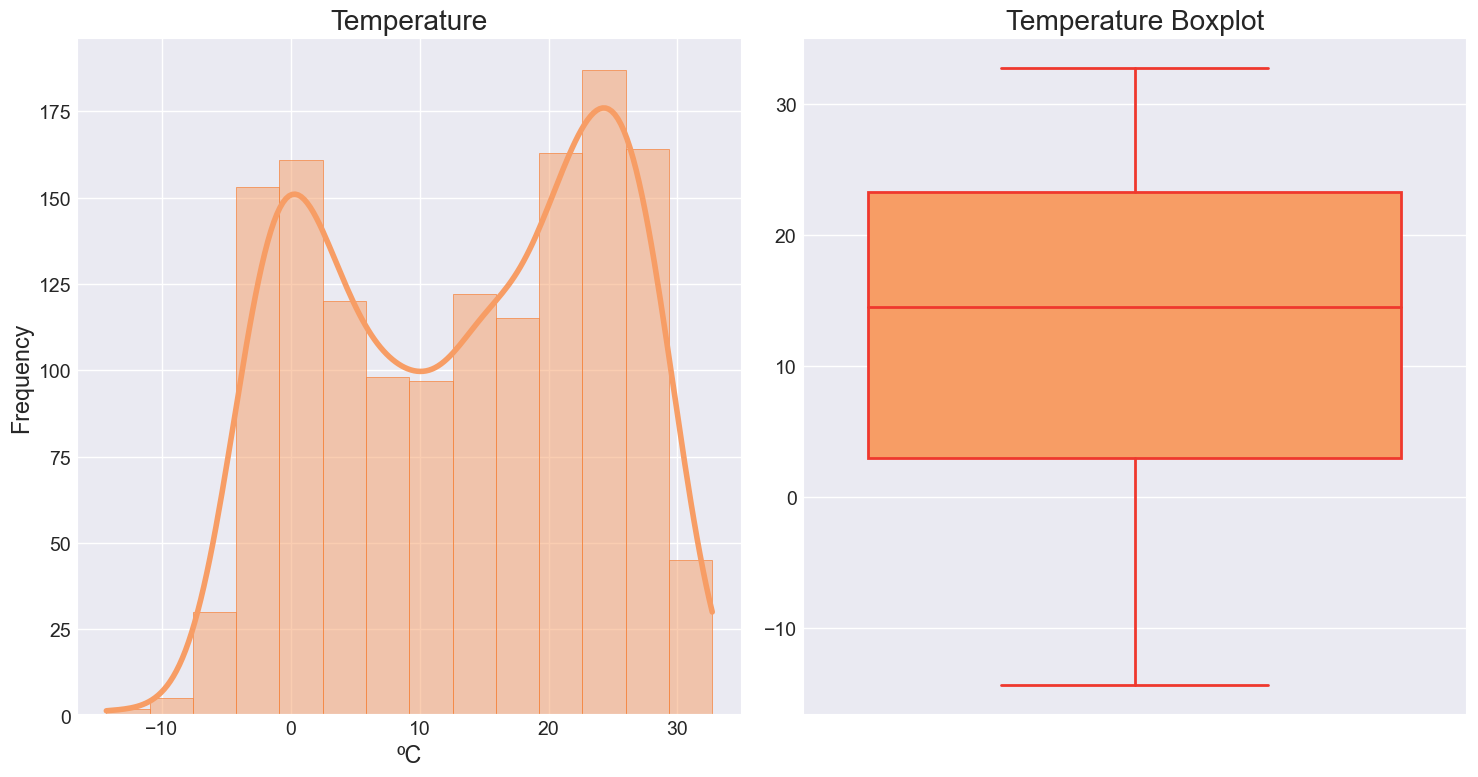

In [65]:
sns.set_style("darkgrid")

# Crear una figura más alta y dos subgráficos uno al lado del otro
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# Histograma y densidad
sns.histplot(data_ts['TEMP'], kde=True, color='#F79D65', edgecolor='#F5843D', ax=axs[0])
axs[0].set_title('Temperature')
axs[0].set_xlabel('ºC')
axs[0].set_ylabel('Frequency')

# Boxplot con diseño personalizado
sns.boxplot(y=data_ts['TEMP'], color='#F79D65', fliersize=0, ax=axs[1], 
            boxprops=dict(facecolor='#F79D65', edgecolor='#EF382E', linewidth=2),
            whiskerprops=dict(color='#EF382E', linewidth=2),
            medianprops=dict(color='#EF382E', linewidth=2),
            capprops=dict(color='#EF382E', linewidth=2))
axs[1].set_title('Temperature Boxplot')
axs[1].set_xlabel('')
axs[1].set_ylabel('')

# Ajustar el espacio entre subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


The values are more concentrated around the 0º and 23º decreasing between this. This makes sense since the are of the measures presents a Humid continental climate with cold winters and warm summers.

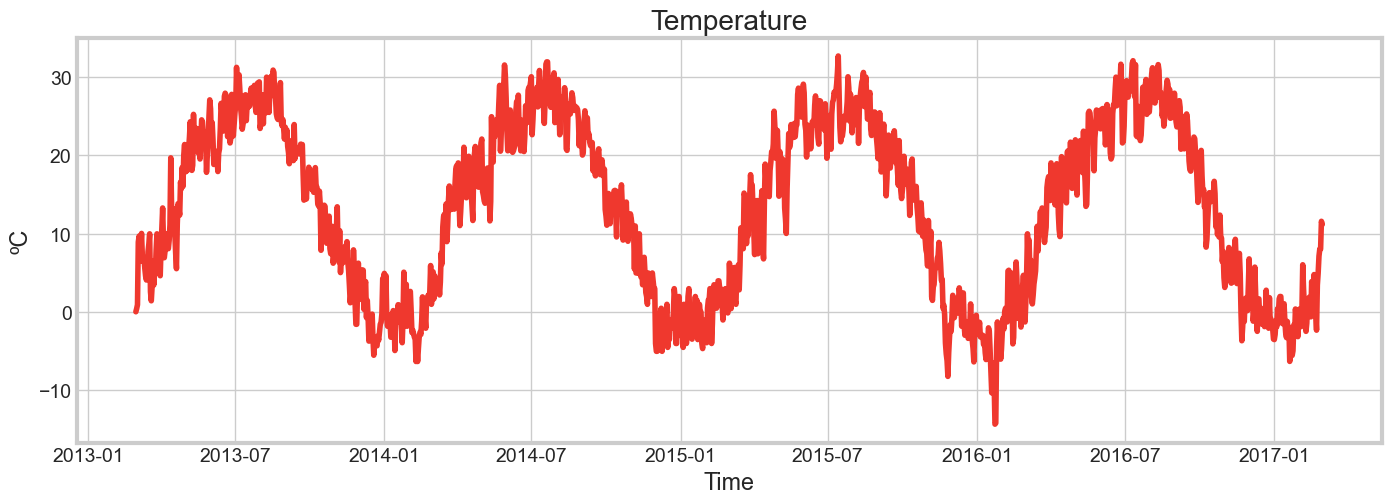

c:\Users\Sofia\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


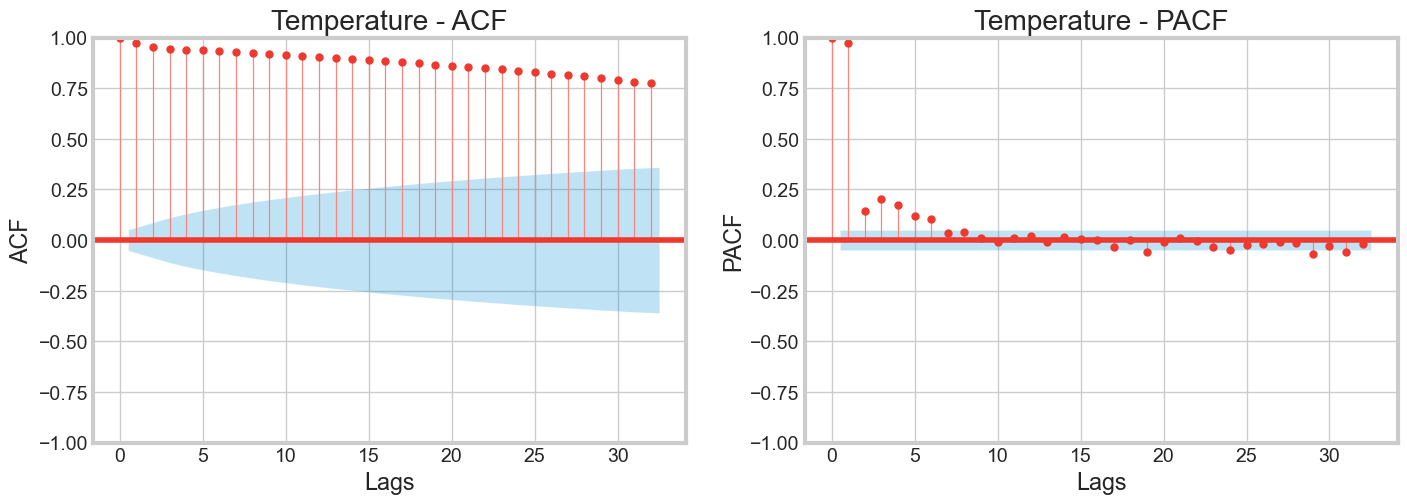

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Establecer el estilo gráfico
sns.set_style("whitegrid")

# Gráfico de la serie temporal
plt.figure(figsize=(15, 5))
sns.lineplot(data=data_ts, x='Date', y='TEMP', color='#EF382E')
plt.xlabel('Time')
plt.ylabel('ºC')
plt.title('Temperature')
plt.show()

# Gráficos de ACF y PACF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))


# ACF
plot_acf(data_ts['TEMP'], ax=ax1, color='#EF382E', vlines_kwargs={'color': '#f58781', 'linewidth': 0.9})
ax1.set_title('Temperature - ACF')
ax1.set_xlabel('Lags')
ax1.set_ylabel('ACF')

# PACF
plot_pacf(data_ts['TEMP'], ax=ax2, color='#EF382E',vlines_kwargs={'color': '#f58781', 'linewidth': 0.9})
ax2.set_title('Temperature - PACF')
ax2.set_xlabel('Lags')
ax2.set_ylabel('PACF')

plt.show()


The ACF shows a constant positive autocorrelation and well above the confidence interval, this defends our deduction of seasonality in the time series. Remember that seasonality refers to recurring patterns in the data that recur at regular time intervals. In this case, the variable presents yearly seasonality.

Moreover, there is no clearly presence of a trend or cyclic behavior.

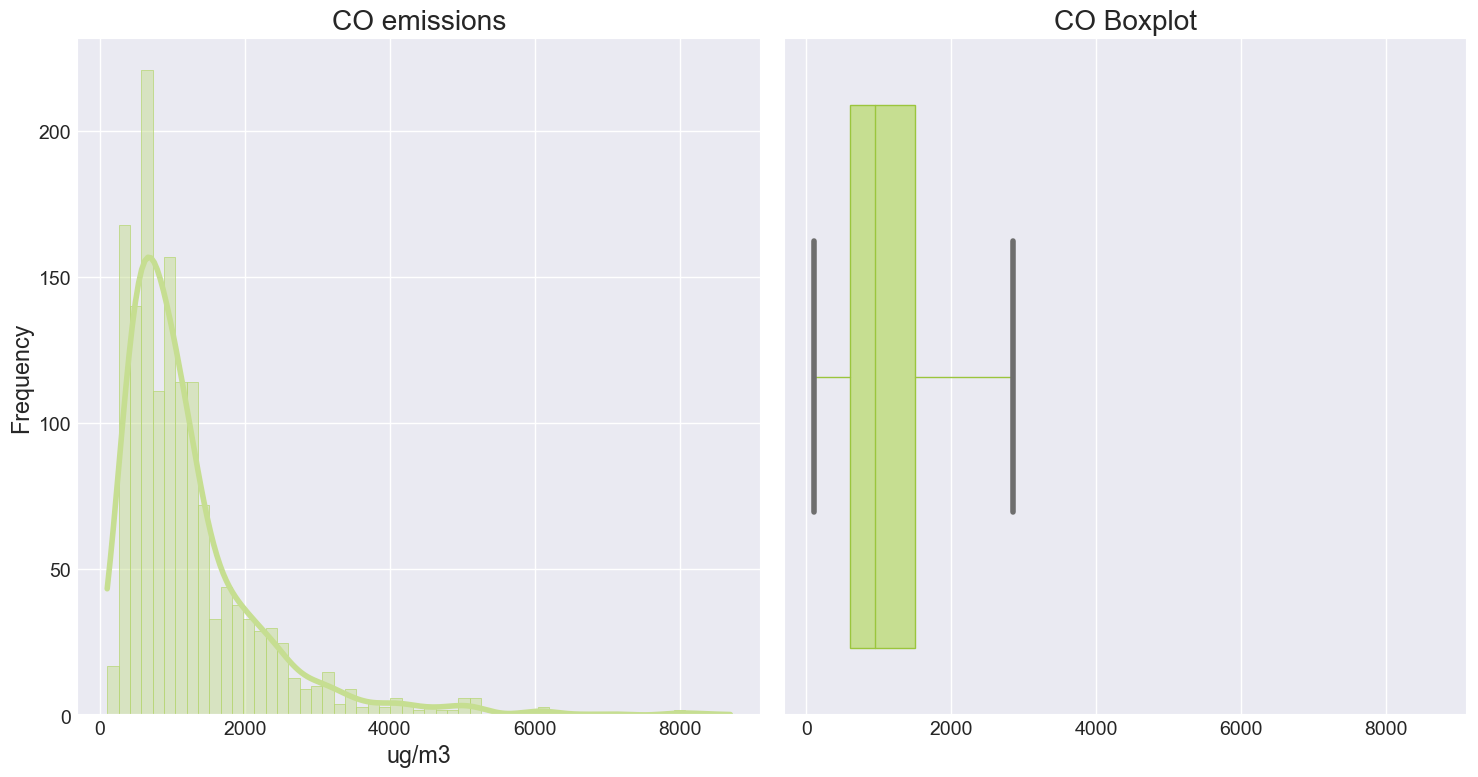

In [70]:
sns.set_style("darkgrid")

# Crear una figura y dos subgráficos uno al lado del otro
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# Histograma y densidad
sns.histplot(data_ts['CO'], kde=True, color='#C6DE91', edgecolor='#B5D572', ax=axs[0])
axs[0].set_title('CO emissions')
axs[0].set_xlabel('ug/m3')
axs[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(x=data_ts['CO'], color='#C6DE91', fliersize=0,
            boxprops=dict(facecolor='#C6DE91', edgecolor='#9BC53D', linewidth=1),
            whiskerprops=dict(color='#9BC53D', linewidth=1),
            medianprops=dict(color='#9BC53D', linewidth=1),
            orient='h')
axs[1].set_title('CO Boxplot')
axs[1].set_xlabel('')
axs[1].set_ylabel('')

# Rotar las etiquetas del eje x en el boxplot
# axs[1].tick_params(axis='x', rotation=90)

# Ajustar el espacio entre subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


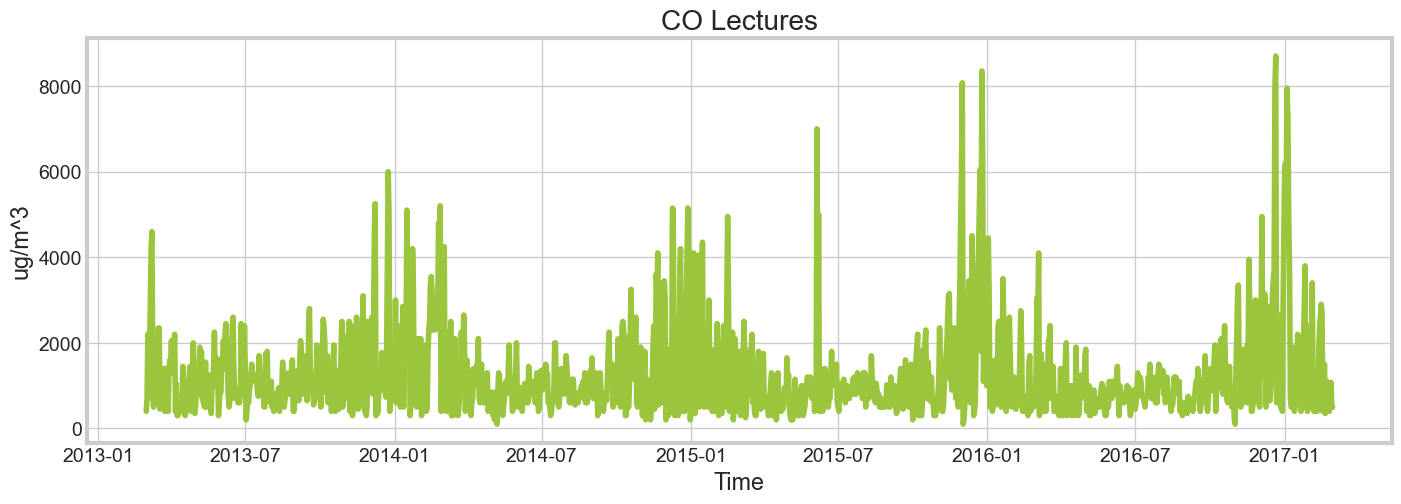

c:\Users\Sofia\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


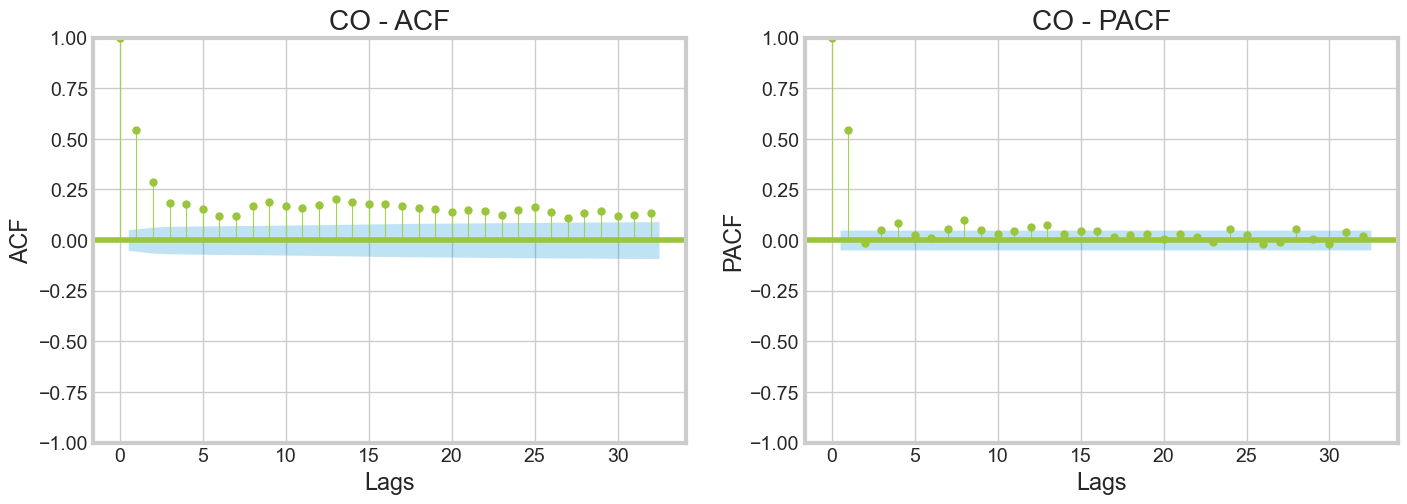

In [73]:
# Establecer el estilo gráfico
sns.set_style("whitegrid")

# Gráfico de la serie temporal CO
plt.figure(figsize=(15, 5))
sns.lineplot(data=data_ts, x='Date', y='CO', color='#9BC53D')
plt.xlabel('Time')
plt.ylabel('ug/m^3')
plt.title('CO Lectures')
plt.show()

# Gráficos de ACF y PACF de CO
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# ACF de CO
plot_acf(data_ts['CO'], ax=ax1, color='#9BC53D', vlines_kwargs={'color': '#a7d149', 'linewidth': 0.8})
ax1.set_title('CO - ACF')
ax1.set_xlabel('Lags')
ax1.set_ylabel('ACF')

# PACF de CO
plot_pacf(data_ts['CO'], ax=ax2, color='#9BC53D', vlines_kwargs={'color': '#a7d149', 'linewidth': 0.8})
ax2.set_title('CO - PACF')
ax2.set_xlabel('Lags')
ax2.set_ylabel('PACF')

plt.show()


The variability changes a lot but the pattern repeats every year so it’s easy to identify some yearly seasonality by.

In addition, the emissions of this pollutant tends to increase every year which might indicate a linear positive trend but this has to be checked in more detail.

Upon examining the Autocorrelation Function (ACF) plot, we observe that the data points fall outside the confidence intervals and don’t drop quickly to zero. However, the lag 1 stands out due to it’s high value.

All of this together make me decide that the time series presents heteroskedasticity and hence will need the transformation Box-Cox. This means we are going to transform the series to a more normal distribution, which can help to reduce the autocorrelation.

 

# Basic Forecasing

In this part we will fit suitable model to the transformed data to perform forecasting for each variable. The target will be 12 months and we will try to find suitable models. With the proper model we expect to be able to learn the impact of the pollutants over the temperature.

 

We will compute the next three type of models for each variable:

* Manual ARIMA.

* Automatic ARIMA.

* Prophet



Before creating and defining the models we want to apply, we must decide which ARIMA manual is the best fit for each variable. To do this, and as explained above, we must observe the ACF and PACF of the variables and differentiate the number of times it’s necessary until the data is really to apply ARIMA.

In [77]:
from sktime.utils.data_processing import from_pandas_to_nested

# Convertir el DataFrame a un objeto Series de sktime
data_t_sktime = from_pandas_to_nested(data_t, time_index='Date')

# Dividir los datos en conjuntos de entrenamiento y prueba
train_total, test_total = temporal_train_test_split(data_t_sktime, test_size=11)

# Dividir el conjunto de entrenamiento en ventanas deslizantes para la validación cruzada
splits = SlidingWindowSplitter(window_length=27, start_with_window=True, step_length=11)
cvsplits = list(splits.split(train_total))

# Mostrar la longitud de los conjuntos de entrenamiento y prueba
print("Longitud del conjunto de entrenamiento:", len(train_total))
print("Longitud del conjunto de prueba:", len(test_total))


ModuleNotFoundError: No module named 'sktime.utils.data_processing'

In [78]:
pip install sktime

Note: you may need to restart the kernel to use updated packages.
